In [1]:
# pyAdvisor.git/advisor/example_scripts/get_arrays_example.py
import pylab as pl
import advisor

In [2]:
# fig = pl.figure(1)
# ax = pl.subplot()
# roofline(self,fig,ax,x,roofs=None,dram_bandwidth=1,
#          mcdram_bandwidth=None,scalar_gflops=2,dp_vect_gflops=4)
# pl.show()

In [3]:
#fn2 = '../csv_advisor_reports/advixe18_report_dom_sphynx.csv'
fn2 = '../csv_advisor_reports/advixe17_report_dom_sphynx.csv'
adv2 = advisor.advisor_results(fn2)
# adv2.print_keys()

# Only show loops from the file:
def op1(val_from_loop,val_filter):
    return ((val_from_loop) == val_filter)

# Only show loops from the file at the corresponding lines:
def op2(val_from_loop,val_filter):
    return (int(val_from_loop) in val_filter)

In [5]:
# --- advisor/2017
ai = adv2.get_array('ai',include_children=True,
                    filterVal=['calculate_divv.f90'],filterKey=['file'],filterOp=[op1])
gflops = adv2.get_array('gflops',include_children=True,
                    filterVal=['calculate_divv.f90'],filterKey=['file'],filterOp=[op1])
times = adv2.get_array('selftime',include_children=True,
                    filterVal=['calculate_divv.f90'],filterKey=['file'],filterOp=[op1])

# # --- advisor/2018
# ai = adv2.get_array('self arithmetic intensity',include_children=True,
#                     filterVal=['calculate_divv.f90'],filterKey=['file'],filterOp=[op1])
# gflops = adv2.get_array('self gflop',include_children=True,
#                     filterVal=['calculate_divv.f90'],filterKey=['file'],filterOp=[op1])
# times = adv2.get_array('self elapsed time',include_children=True,
#                     filterVal=['calculate_divv.f90'],filterKey=['file'],filterOp=[op1])

# ai = adv2.get_array('ai',include_children=True,
#                     filterVal=['charge.F90',[2681,2730,9552]],
#                     filterKey=['file'  ,'line'],filterOp=[op1,op2])
# gflops = adv2.get_array('gflops',include_children=True,
#                     filterVal=['charge.F90',[2681,2730,9552]],
#                     filterKey=['file'  ,'line'],filterOp=[op1,op2])
# times = adv2.get_array('selftime',include_children=True,
#                     filterVal=['charge.F90',[2681,2730,9552]],
#                     filterKey=['file'  ,'line'],filterOp=[op1,op2])

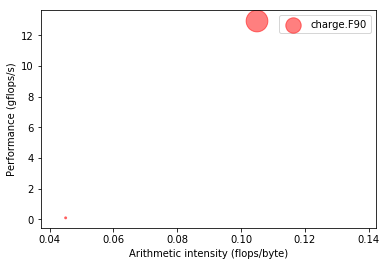

In [6]:
fig = pl.figure(1)
ax = pl.subplot()
scatter = ax.scatter(ai,
                     gflops,
                     times*400,
                     marker='o',
                     color='r',
                     alpha=0.5,
                     label='sphynx/calculate_divv.f90')
ax.legend(loc='best')
ax.set_xlabel('Arithmetic intensity (flops/byte)')
ax.set_ylabel('Performance (gflops/s)')
pl.show()

In [7]:
# adv2.print_keys()